# Analítica de datos
# Examen parcial 1
# 2019-02

# <font color='red'> NOMBRE APELLIDO, código </font>

# <font color='red'>ENTREGA PRIMERA PARTE</font> - <font color='blue'> EN CLASE </font>

Usted es el encargado de analítica de una empresa de telefonía celular y tiene que proporcionar soluciones para hacer frente a las problemáticas de un sector que ha llegado a saturación del mercado. Tanto su empresa como sus competidores directos tienen que disputarse por una base de clientes limitada, de tal forma que usted tiene que responder a un objetivo estratégico definido por la dirección así:  

    "Mantener y fidelizar a nuestros clientes por medio de un servicio de calidad que se adapte a sus necesidades particulares."
    
Su compañía dispone de una base de datos histórica de personas que hace un año eran clientes propios. Algunos de esos clientes siguen siéndolo hoy en día, otros ya no lo son. La idea es podeer identificar los clientes que son propensos a dejar la compañía, para poder pensar en programas de fidelización preventivos.

Los campos del dataset son los siguientes:
1.  ID: Código identificador de los clientes de la compañía de telefonía móvil
1.	ESTADO: Describe si el usuario sigue con la compañía (VINCULADO) o no (RETIRADO)
1.	INGRESOS: Promedio de ingresos del cliente en pesos
1.	CASA: Precio de la casa en la que vive el cliente en pesos
1.	PRECIO_DISPOSITIVO: Precio del celular del cliente en pesos
1.  GÉNERO: "Hombre" o "Mujer"
1.	MESES: Antigüedad del usuario en meses
1.	DURACION: Promedio de duración de las llamadas hechas por el cliente en minutos
1.	SOBRECARGO: Promedio de minutos que se sobrepasa el usuario en un mes
1.	SALDO_RESTANTE: Promedio de minutos de su plan que le quedan al usuario sin utilizar cada mes
1.	SATISFACCION: nivel de satisfacción del usuario de 0 a 10 (muy satisfecho), obtenido a partir de una encuesta.

La idea es poder predecir el ESTADO a partir de las otras variables, utilizando modelos de aprendizaje supervisado (KNN, NaiveBayes, y regresión logística).

# 1. Entendimiento de los datos, limpieza

El archivo "DatosTelco.csv" contiene el dataset que tienen que analizar.
Se recomienda abrirlo primero en un lector de archivos planos para entender preliminarmente su formato y así poderlo cargar adecuadamente con Python.

Teniendo en cuenta el tipo de problema en cuestión (clasificación o regresión), realice un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

Tenga en cuenta lo siguiente: 
- para modificar ciertos valores de un dataframe, se utiliza "df.replace('oldvalue', 'newvalue')", si se trata de un valor NaN, se utiliza *np.nan* (ya sea el oldvalue o el newvalue)
- para cambiar un tipo de dato a numérico en una estructura de pandas, se utiliza su método ".astype('float64')"
- para negar una condición en python se utiliza el símbolo "~"
- para obtener una tabla de frecuencias de los registros (filas) con respecto al valor de una variable categórica se utiliza "pd.crosstab(index=df['var'], columns="conteo")
- para cambiar los valores de una columna en un dataframe con condiciones, utilizar "df.loc[condicion, 'columna']=newVal"
- cuando haya atributos con demasiados valores faltantes, pueden eliminar la columna correspondiente.
- cuando haya atributos con unos pocos valores faltantes, pueden eliminar los registros correspondientes.
- cuando el número de valores faltantes de un atributo no sea tan elevado, pero si sea considerable, pueden reemplazar los valores faltantes:
  - Si se trata de una variable categórica, pueden crear un nuevo valor, o reemplazar por la categoría más común
  - Si se trata de una variable numérica, pueden reemplazar por el promedio de los valores presentes del atributo
- cuando se quiere ordenar un dataframe por los valores de una columna se usa "df.sort_values("COLUMNA", ascending=True)"
- para borrar los registros a partir de un índice de fila se utiliza "df.drop([0,3])"
- para borrar los registros a partir de una condición se utiliza "df = df[df.edad<99]"
- para borrar una columna por nombre se utiliza --> df = df.drop('columna',axis=1) 

# Puntos a desarrollar

DURANTE EL EXAMEN, EN CLASE: 
1. <font color='red'>Carguen el archivo en memoria y exploren los datos. Antes de hacer limpieza identifiquen, el baseline global (0.1) y los baselines por GÉNERO (0.2).
   ¿A primera vista, solo considerando el género, cree que es una buena idea crear un modelo predictivo de la deserción de hombres y de mujeres de manera separada? (0.2).</font>
2. <font color='red'>Identifiquen los problemas e inconsistencias que tienen los datos, teniendo en cuenta el diccionario de datos y el contexto del problema. Limpien los datos, argumentando las razones de cada transformación o eliminación de datos.
(1.1). </font>

EN CASA, PARA ENTREGAR: 
3. <font color='red'>Para arreglar un problema existente en la variable CASA: (1.0)
    * utilice un modelo de regresión lineal (use el modelo sklearn.linear_model.LinearRegression, no use statsmodels)
    * considere solo las demas variables NUMÉRICAS como variables predictivas
    * cree el mejor modelo que utilice 1 solo variable, calcule el R2 ajustado e interprételo
    * utilice holdout (70/30) como protocolo de evaluación
</font>

# 1.1 Carga y baselines pre-limpieza de datos

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression # modelos lineales
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score #protocolo de evaluación
from sklearn import datasets, metrics
from sklearn import preprocessing
import seaborn as sns

...

...

...

In [2]:
df = pd.read_csv('03-04-DatosTelco.csv',';')
df.head()

,ID,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,GENERO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,VINCULADO,4074840,6.878215e+08,1444153.0,Mujer,26,2.3,11.167542,20.3,1.762872
1,2,VINCULADO,8574088,1.349120e+09,2157661.0,Hombre,23,3.7,0.000000,53.5,3.361266
2,3,RETIRADO,795993,1.326558e+08,452809.0,Mujer,38,16.8,350.610224,13.9,8.359438
3,4,RETIRADO,8115015,1.290405e+09,2617184.0,Mujer,37,17.6,230.913888,45.7,8.964017
4,5,RETIRADO,8187499,1.305348e+09,666069.0,Mujer,19,0.0,131.541983,67.2,8.808206


In [3]:
df.tail()

,ID,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,GENERO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
23157,23158,RETIRADO,473169,8.888342e+07,1128088.0,Hombre,28,14.9,153.90060,18.6,8.359296
23158,23159,VINCULADO,3544204,5.350386e+08,332460.0,Mujer,0,2.0,20.31440,16.4,2.670153
23159,23160,RETIRADO,7523054,1.158340e+09,296138.0,Mujer,6,17.8,290.73090,58.9,8.510907
23160,23161,VINCULADO,1205914,2.737018e+08,2206199.0,Mujer,44,16.1,139.29630,18.2,8.773616
23161,23162,VINCULADO,8343704,1.328386e+09,2022312.0,Hombre,0,16.8,21.57594,64.9,2.332979


In [4]:
df.shape

(23162, 11)

In [5]:
df.columns.tolist()

['ID',
 'ESTADO',
 'INGRESOS',
 'CASA',
 'PRECIO_DISPOSITIVO',
 'GENERO',
 'MESES',
 'DURACION',
 'SOBRECARGO',
 'SALDO_RESTANTE',
 'SATISFACCION']

In [6]:
df.describe()

,ID,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
count,23162.000000,2.316200e+04,2.306200e+04,2.316200e+04,23162.000000,23162.000000,23159.000000,23162.000000,23162.000000
mean,11581.500000,4.813115e+06,7.823571e+08,1.454784e+06,23.862620,9.609852,110.050331,42.991888,5.480840
std,6686.437803,2.737374e+06,5.540029e+08,1.427590e+07,14.816863,7.040007,100.769297,30.204540,2.809938
min,1.000000,1.500000e+05,-1.779042e+07,1.693380e+02,-55.000000,0.000000,0.000000,0.000000,0.613580
25%,5791.250000,2.156296e+06,3.660683e+08,6.571840e+05,14.000000,2.100000,12.568985,15.200000,2.705504
50%,11581.500000,6.137553e+06,9.703263e+08,1.237542e+06,24.000000,14.600000,75.379060,37.650000,4.064550
75%,17371.750000,7.347180e+06,1.171952e+09,1.829751e+06,34.000000,16.100000,201.529547,70.000000,8.268244
max,23162.000000,9.650000e+06,4.664422e+10,1.859365e+09,79.000000,20.100000,411.168400,130.700000,9.642618


In [7]:
df.describe(include = np.object)

,ESTADO,GENERO
count,23157,23162
unique,2,2
top,RETIRADO,Hombre
freq,11660,11647


In [8]:
df['ESTADO'].value_counts()

RETIRADO     11660
VINCULADO    11497
Name: ESTADO, dtype: int64

In [9]:
df['GENERO'].value_counts()

Hombre    11647
Mujer     11515
Name: GENERO, dtype: int64

In [10]:
df.isnull().sum()

ID                      0
ESTADO                  5
INGRESOS                0
CASA                  100
PRECIO_DISPOSITIVO      0
GENERO                  0
MESES                   0
DURACION                0
SOBRECARGO              3
SALDO_RESTANTE          0
SATISFACCION            0
dtype: int64

In [12]:
df = df.dropna(subset = ['ESTADO', 'SOBRECARGO'])

In [13]:
df.isnull().sum()

ID                      0
ESTADO                  0
INGRESOS                0
CASA                  100
PRECIO_DISPOSITIVO      0
GENERO                  0
MESES                   0
DURACION                0
SOBRECARGO              0
SALDO_RESTANTE          0
SATISFACCION            0
dtype: int64

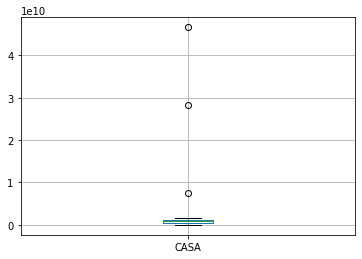

In [14]:
df.boxplot(column=['CASA'])

In [15]:
df = df[df['CASA'] <= df['CASA'].quantile(0.99)]
df['CASA'] = df['CASA'].abs()

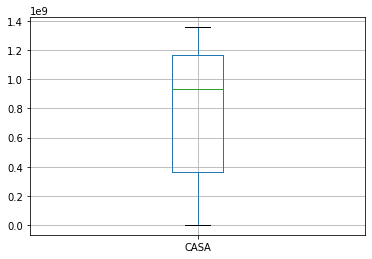

In [16]:
df.boxplot(column=['CASA'])

In [17]:
df[['CASA']].describe()

,CASA
count,2.282300e+04
mean,7.728010e+08
std,4.230393e+08
min,2.036957e+05
25%,3.609183e+08
50%,9.361134e+08
75%,1.168336e+09
max,1.358020e+09


In [21]:
len(df[df.MESES < 0]['MESES'])

152

In [24]:
df['MESES'] = df['MESES'].abs()

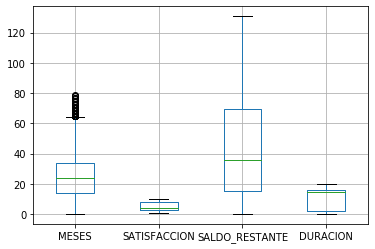

In [32]:
df.boxplot(column= ['MESES', 'SATISFACCION', 'SALDO_RESTANTE', 'DURACION'])

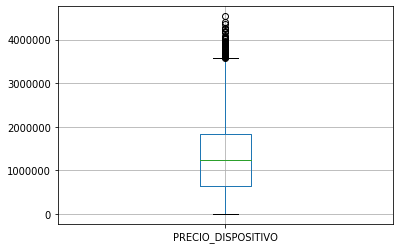

In [33]:
df.boxplot(column= 'PRECIO_DISPOSITIVO')

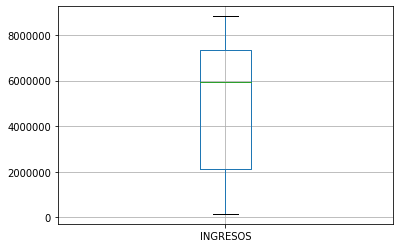

In [34]:
df.boxplot(column= 'INGRESOS')

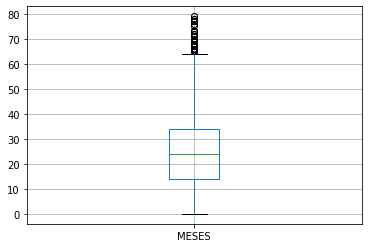

In [36]:
df.boxplot(column = 'MESES')

In [38]:
df.describe(include='all')

,ID,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,GENERO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
count,22823.000000,22823,2.282300e+04,2.282300e+04,2.282300e+04,22823,22823.000000,22823.000000,22823.000000,22823.000000,22823.000000
unique,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,RETIRADO,NaN,NaN,NaN,Hombre,NaN,NaN,NaN,NaN,NaN
freq,NaN,11504,NaN,NaN,NaN,11477,NaN,NaN,NaN,NaN,NaN
mean,11601.857468,NaN,4.774434e+06,7.728010e+08,1.311085e+06,NaN,24.200938,9.609482,110.169896,42.700530,5.482755
std,6687.656978,NaN,2.725597e+06,4.230393e+08,7.466208e+05,NaN,14.263142,7.040987,100.810010,30.180782,2.809528
min,1.000000,NaN,1.500000e+05,2.036957e+05,1.693380e+02,NaN,0.000000,0.000000,0.000000,0.000000,0.613580
25%,5861.500000,NaN,2.112856e+06,3.609183e+08,6.531475e+05,NaN,14.000000,2.100000,12.656025,15.100000,2.706657
50%,11618.000000,NaN,5.931223e+06,9.361134e+08,1.232947e+06,NaN,24.000000,14.600000,75.625530,35.700000,4.102860
75%,17389.500000,NaN,7.329446e+06,1.168336e+09,1.823124e+06,NaN,34.000000,16.100000,201.631300,69.750000,8.268228


In [39]:
df.isnull().sum()

ID                    0
ESTADO                0
INGRESOS              0
CASA                  0
PRECIO_DISPOSITIVO    0
GENERO                0
MESES                 0
DURACION              0
SOBRECARGO            0
SALDO_RESTANTE        0
SATISFACCION          0
dtype: int64

### Baseline global

...

...

...

### Baselines por género

...

...

...

### Conclusión

...

...

...

# 1.2 Análisis de los problemas de calidad de datos

...

...

...

### Resumen de problemas encontrados, acciones tomadas:

1. [variable] [tipo de problema]: [solución argumentada]

1. [variable] [tipo de problema]: [solución argumentada]

                    
                    

# <font color='red'>ENTREGA SEGUNDA PARTE</font> - <font color='blue'> POST-CLASE </font>

# 1.3 Valores faltantes de CASA: modelo de regresión lineal usando holdout y forward stepwise

...

...

...

# 2. Modelos de clasificación

## Puntos a desarrollar:

<font color='red'>El objetivo final es identificar los clientes más propensos a irse de la compañía, con el fin de poder realizar campañas de fidelización. Para tal propósito, se ha decidido buscar el mejor modelo entre **K-NN** y **Naïve Bayes**, pero **solo considerando las variables predictivas numéricas**. </font>

1. <font color='red'> Establezca el **protocolo de evaluación** y la métrica de evaluación más adecuados para la construcción de los modelos de clasificación (0.3)</font>

2. <font color='red'> Construya del mejor modelo **K-NN**, buscando el mejor valor de K (subir hasta un valor de K=25) (1.1)</font>

3. <font color='red'> Construya del mejor modelo **Naïve Bayes** (use la clase GaussianNB), buscando el mejor valor del suavizador de Laplace (var_smoothing) (0.7)</font>

4. <font color='red'> Compárelos (métricas, matriz de confusión), escoja el mejor, y concluya (0.3)</font>

# 2.1 Protocolo de evaluación

...

...

...

# 2.2 Modelo K-NN

...

...

...

# 2.3 Modelo Naïve Bayes

...

...

...

# 2.4 Comparación

...

...

...